In [1]:
import numpy as np     
import pandas as pd

## Visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')

In [3]:
conditions = [
    (data['product_rating'] >= 1) & (data['product_rating'] <= 2),
    (data['product_rating'] > 2) & (data['product_rating'] <= 2.5),
    (data['product_rating'] > 2.5) & (data['product_rating'] <= 3),
    (data['product_rating'] > 3) & (data['product_rating'] <= 3.5),
    (data['product_rating'] > 3.5) & (data['product_rating'] <= 4),
    (data['product_rating'] > 4) & (data['product_rating'] <= 4.5),
    (data['product_rating'] > 4.5) & (data['product_rating'] <= 5)
]

extrapolation_percentages = [
    0,  # No change for ratings between 1 and 2
    0.05,  # 5% extrapolation for ratings between 2 and 2.5
    0.10,  # 10% extrapolation for ratings between 2.6 and 3
    0.20,  # 20% extrapolation for ratings between 3.1 and 3.5
    0.30,  # 30% extrapolation for ratings between 3.6 and 4
    0.40,  # 40% extrapolation for ratings between 4.1 and 4.5
    0.50   # 50% extrapolation for ratings between 4.6 and 5
]

data['extrapolated_review_count'] = data['customer_reviews_count'] + (np.select(conditions, extrapolation_percentages, default=0) * data['customer_reviews_count'])
data['sold_item_count'] = data['extrapolated_review_count']
data['sales'] = data['selling_price']*data['sold_item_count']

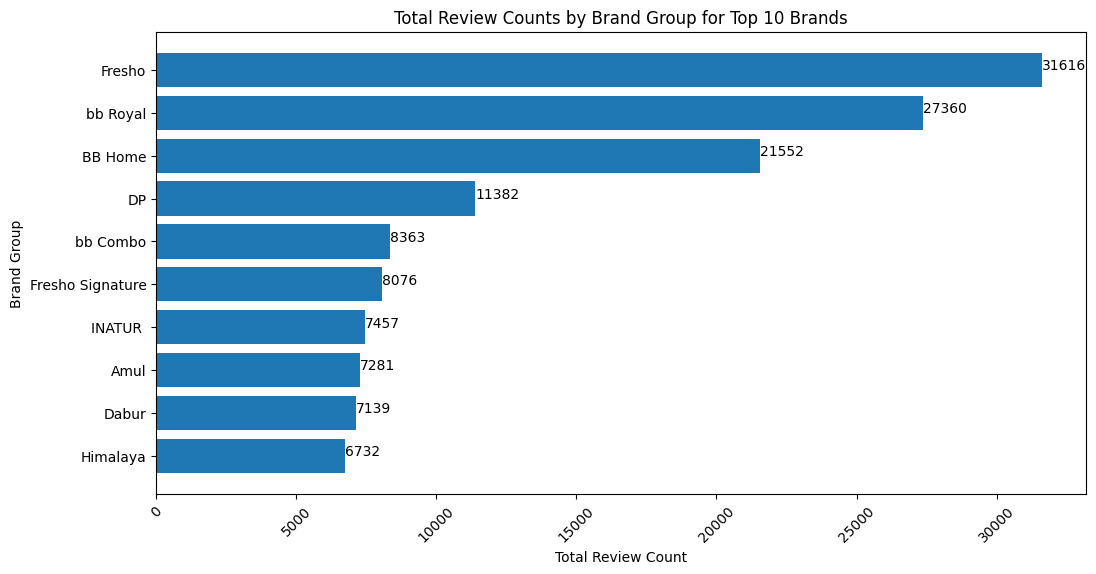

In [4]:
#Total Reviews Count by Brand

aggregated_df = data.groupby('brand')['customer_reviews_count'].sum().reset_index()

# Top N Analysis: Select top N brands by review count
top_brands = data.groupby('brand')['customer_reviews_count'].sum().nlargest(10).index

# Filter data for the top 10 brands
top_brands_data = data[data['brand'].isin(top_brands)]

# Group by brand group and sum the review counts
top_brands_grouped = top_brands_data.groupby('brand')['customer_reviews_count'].sum().reset_index()

top_brands_grouped.sort_values(by='customer_reviews_count', ascending=True, inplace=True)

# Visualization: Bar plot of total review counts by brand group for the top 10 brands
plt.figure(figsize=(12, 6))
plt.barh(top_brands_grouped ['brand'], top_brands_grouped ['customer_reviews_count'])
plt.title('Total Review Counts by Brand Group for Top 10 Brands')
plt.xlabel('Total Review Count')
plt.ylabel('Brand Group')
plt.xticks(rotation=45)

# Annotate each bar with its corresponding value
for index, value in enumerate(top_brands_grouped['customer_reviews_count']):
    plt.text(value, index, str(value))
plt.show()

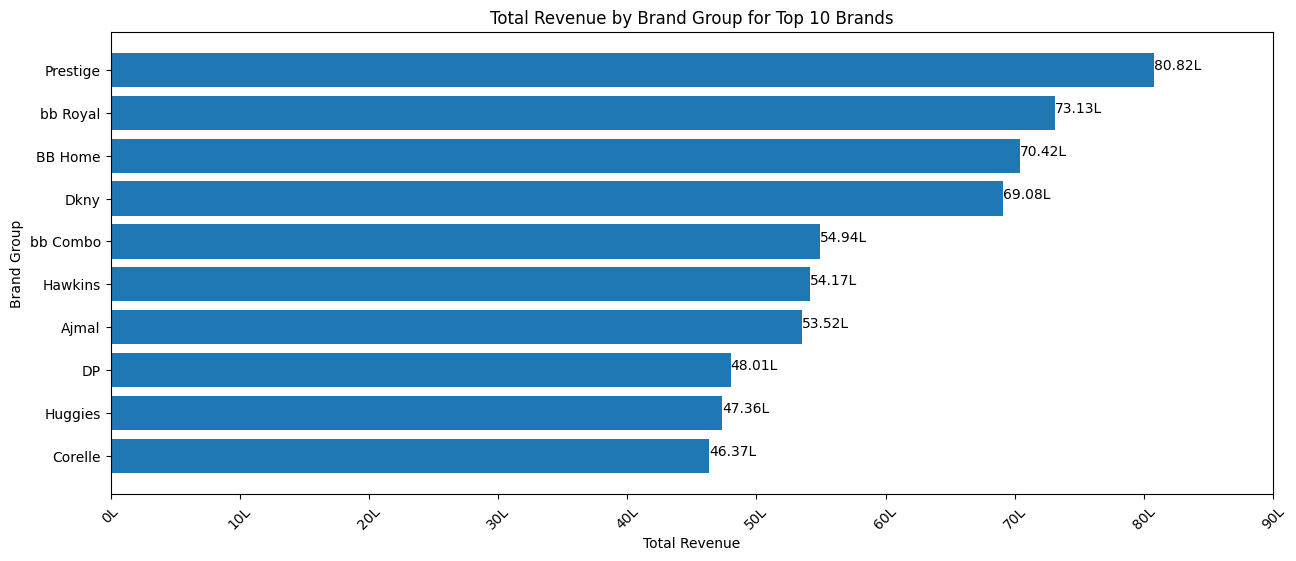

In [5]:
#Total Revenue by Brand

aggregated_df = data.groupby('brand')['sales'].sum().reset_index()

# Top N Analysis: Select top N brands by review count
top_brands = data.groupby('brand')['sales'].sum().nlargest(10).index

# Filter data for the top 10 brands
top_brands_data = data[data['brand'].isin(top_brands)]

# Group by brand group and sum the review counts
top_brands_grouped = top_brands_data.groupby('brand')['sales'].sum().reset_index()

top_brands_grouped.sort_values(by='sales', ascending=True, inplace=True)

# Visualization: Bar plot of total review counts by brand group for the top 10 brands
plt.figure(figsize=(15, 6))
plt.barh(top_brands_grouped ['brand'], top_brands_grouped ['sales'])
plt.title('Total Revenue by Brand Group for Top 10 Brands')
plt.xlabel('Total Revenue')
plt.ylabel('Brand Group')
plt.xticks(rotation=45)

plt.xticks(ticks=plt.xticks()[0], labels=[f'{x/10**5:.0f}L' for x in plt.xticks()[0]])

# Annotate each bar with its corresponding value
for index, value in enumerate(top_brands_grouped['sales']):
    plt.text(value, index, str(round(value/10**5,2))+'L',color='black',fontsize=10)
plt.show()

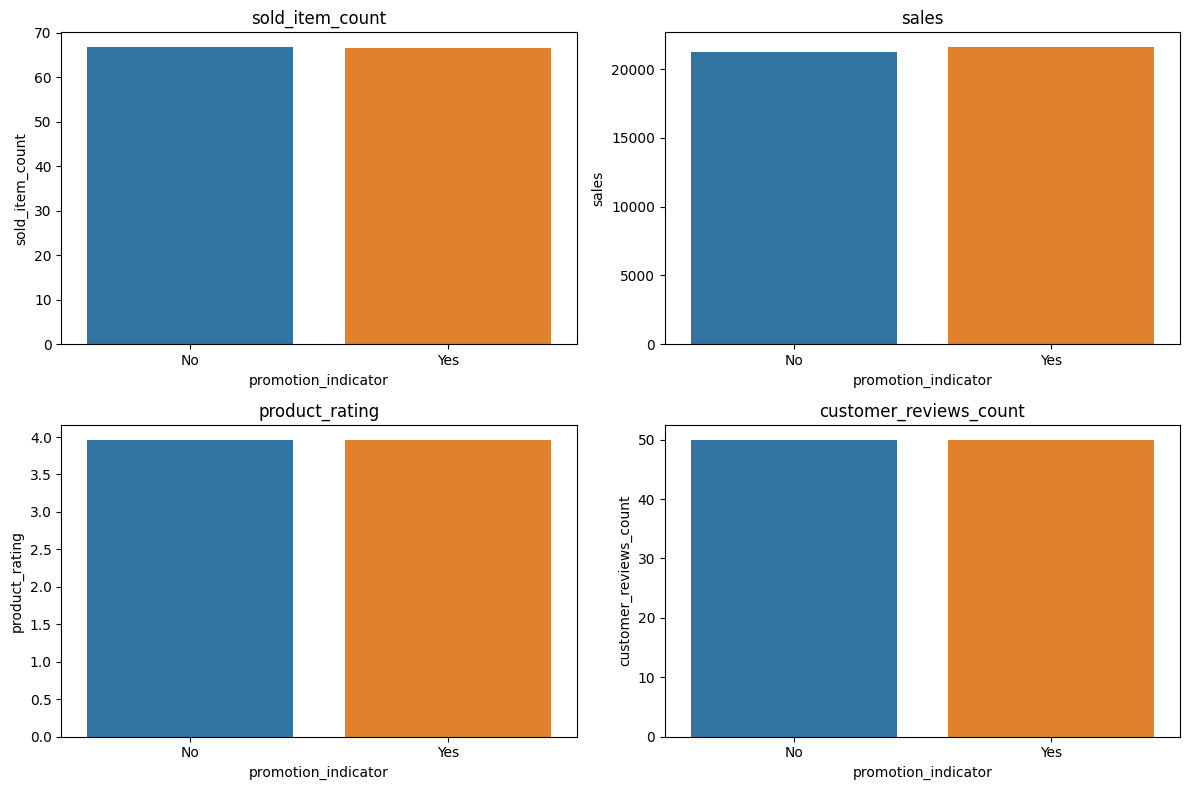

In [6]:
# Data analysis
promotion_groups = data.groupby('promotion_indicator')

# Summary statistics
summary_stats = promotion_groups[['sold_item_count', 'sales', 'product_rating', 'customer_reviews_count']].mean()

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(['sold_item_count', 'sales', 'product_rating', 'customer_reviews_count']):
    sns.barplot(x=summary_stats.index, y=summary_stats[col], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)

plt.tight_layout()
plt.show()

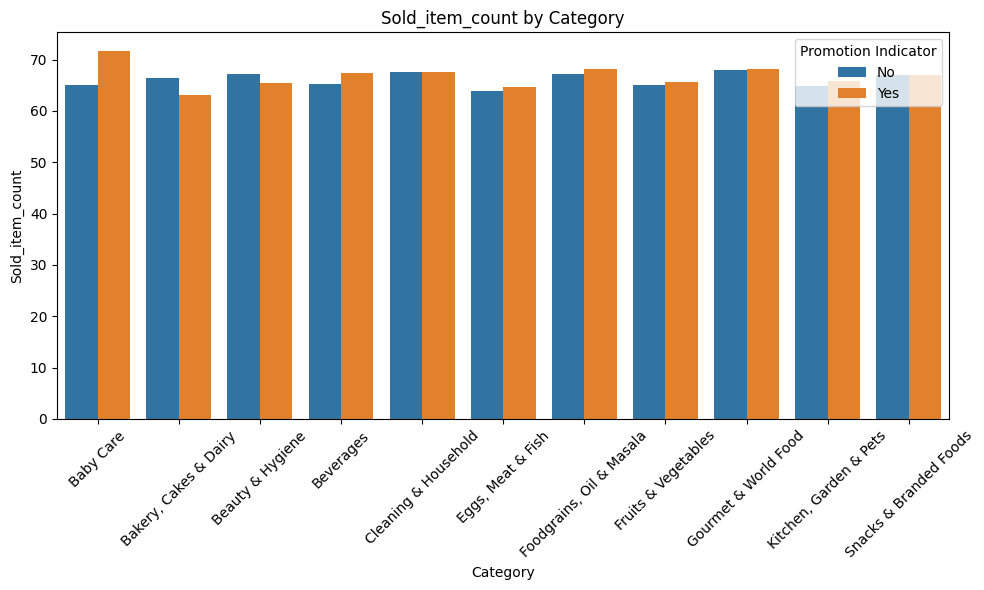

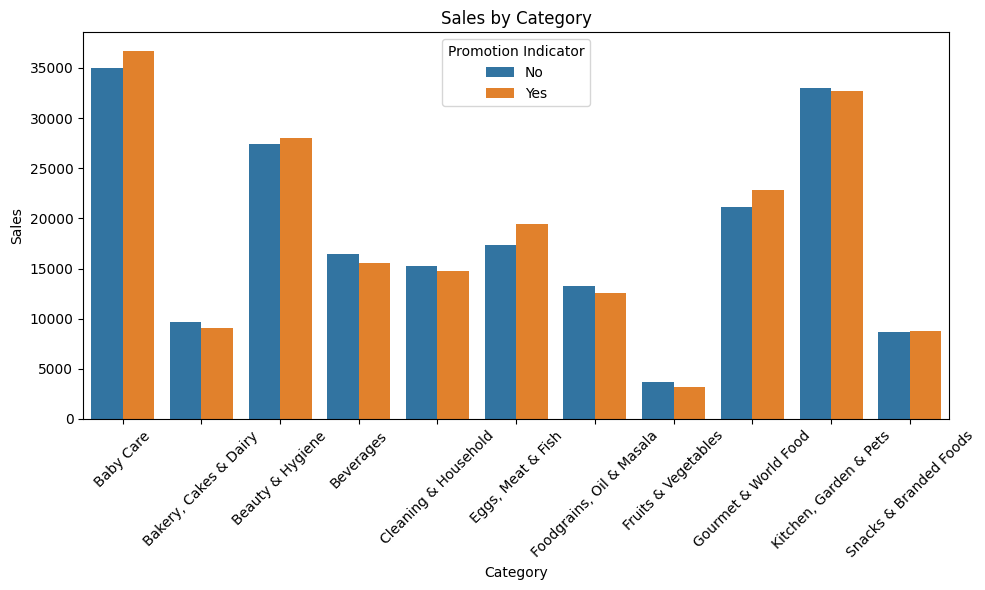

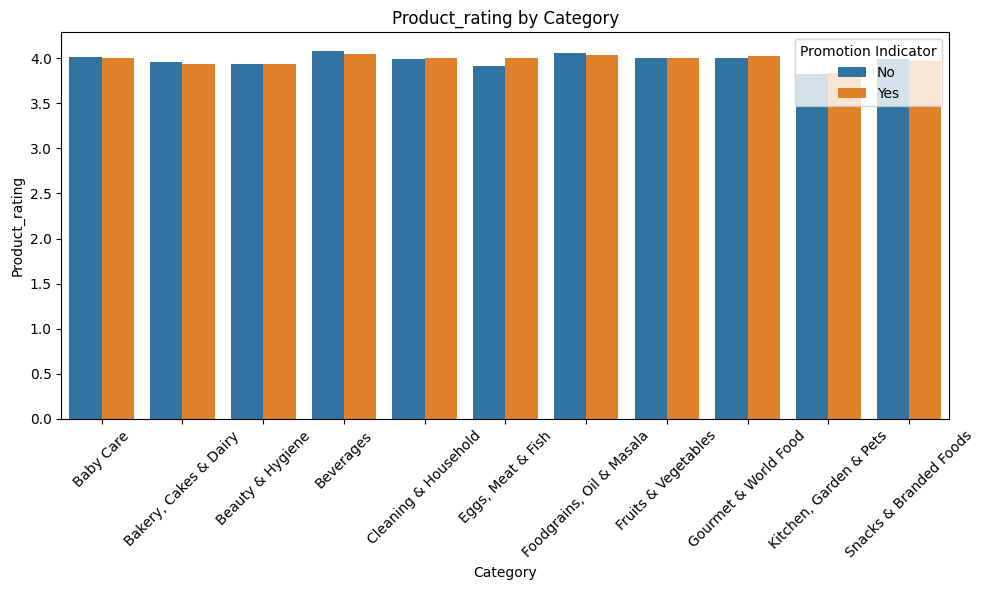

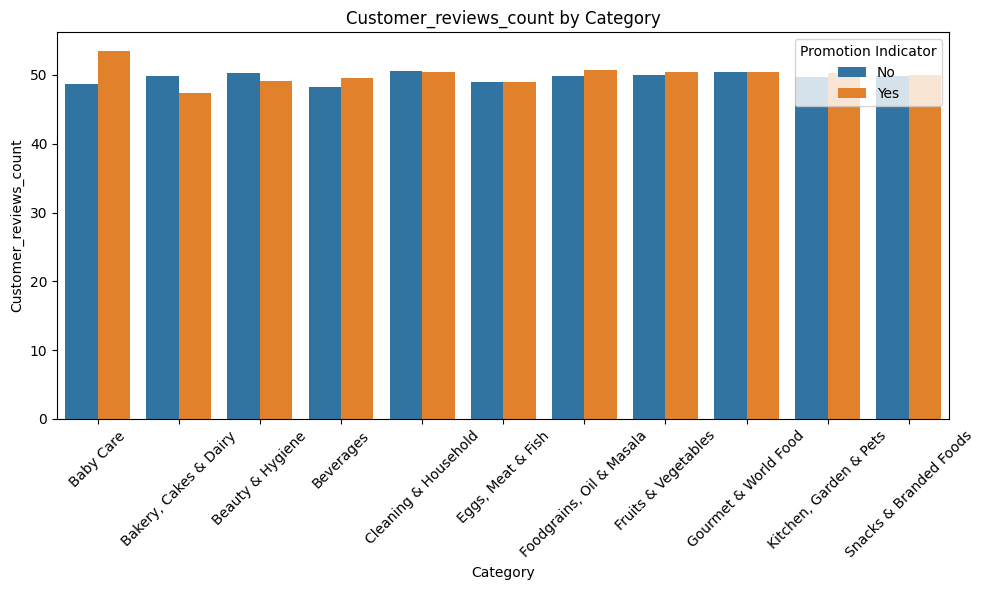

In [7]:
promotion_category_groups = data.groupby(['category', 'promotion_indicator'])

# Summary statistics
summary_stats = promotion_category_groups[['sold_item_count', 'sales', 'product_rating', 'customer_reviews_count']].mean().reset_index()

# summary_stats.to_csv('summary_stats.csv', index=False)
# Visualization
# fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

# for i, col in enumerate(['sold_item_count', 'sales', 'product_rating', 'customer_reviews_count']):
#     sns.barplot(data=summary_stats, x='category', y=col, hue='promotion_indicator', ax=axes[i//2, i%2])
#     axes[i//2, i%2].set_title(col)

# plt.tight_layout()
# plt.show()

# Plot separate column charts
metrics = ['sold_item_count', 'sales', 'product_rating', 'customer_reviews_count']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=summary_stats, x='category', y=metric, hue='promotion_indicator')
    plt.title(f'{metric.capitalize()} by Category')
    plt.xlabel('Category')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45)
    plt.legend(title='Promotion Indicator')
    plt.tight_layout()
    plt.show()

In [8]:
promotion_category_groups = top_brands_data.groupby(['brand', 'promotion_indicator'])
# Summary statistics
summary_stats = promotion_category_groups[['sold_item_count', 'sales', 'product_rating', 'customer_reviews_count']].mean().reset_index()

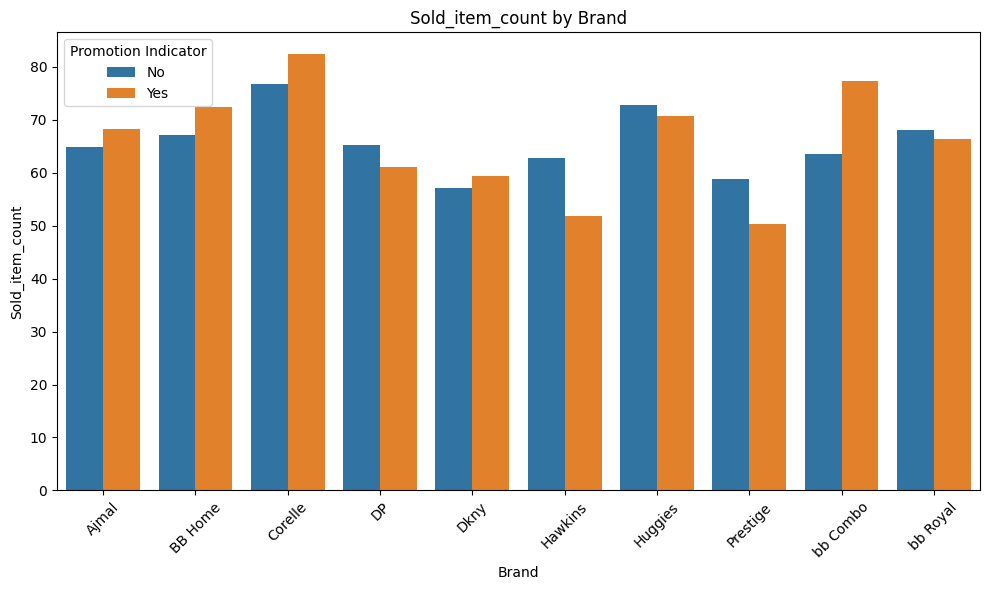

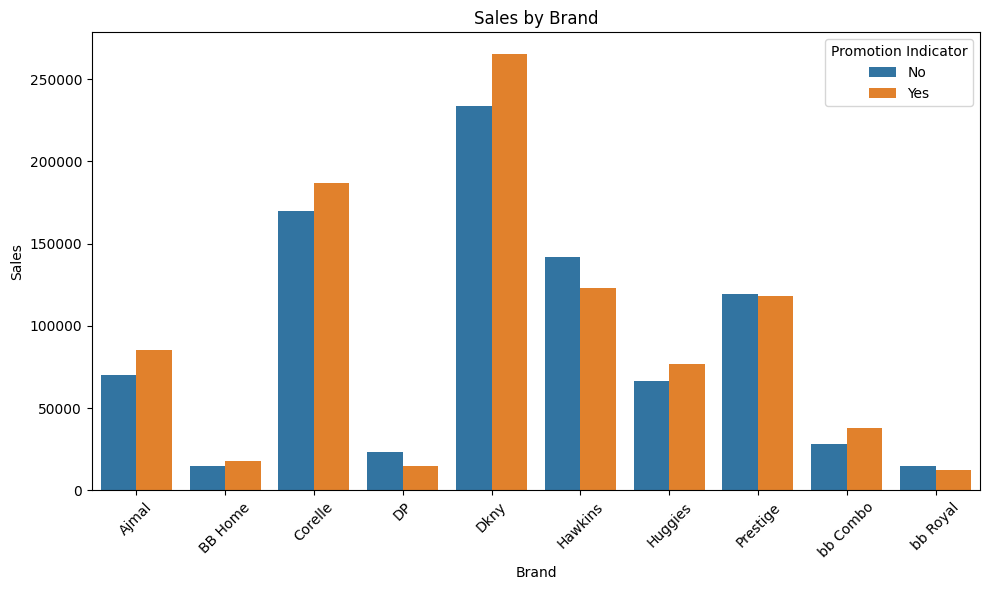

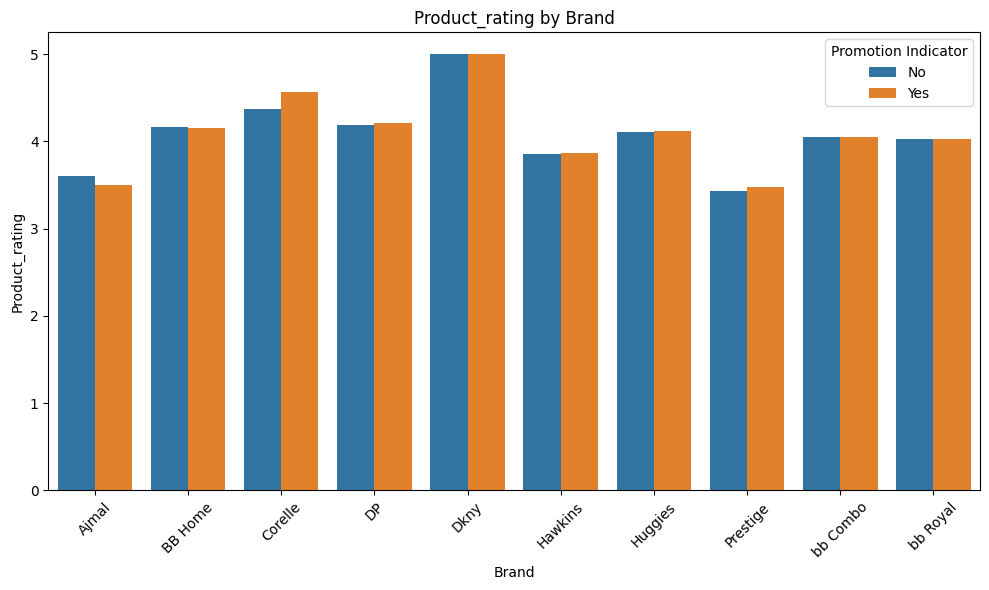

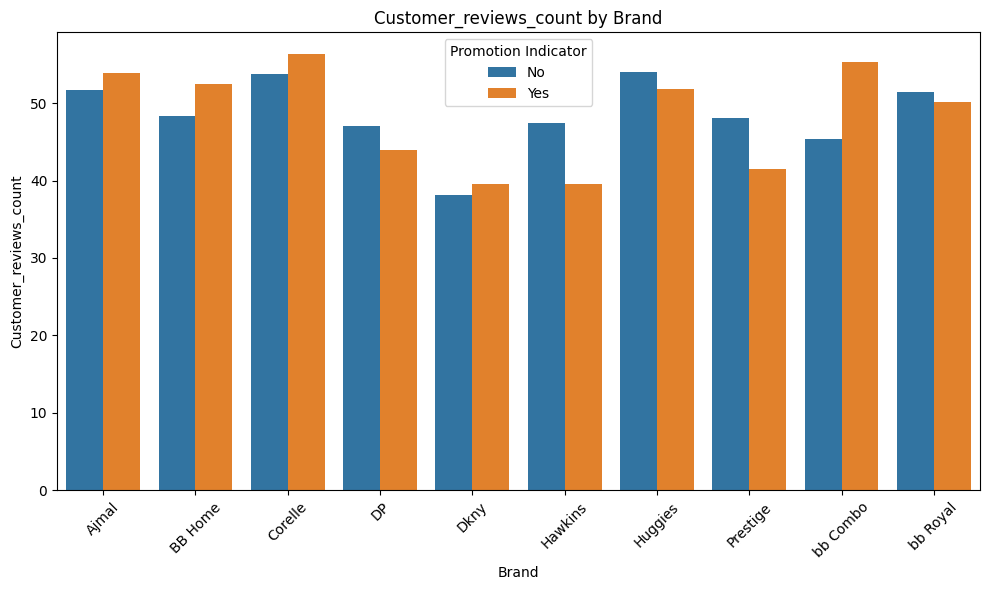

In [9]:
# Plot separate column charts
metrics = ['sold_item_count', 'sales', 'product_rating', 'customer_reviews_count']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=summary_stats, x='brand', y=metric, hue='promotion_indicator')
    plt.title(f'{metric.capitalize()} by Brand')
    plt.xlabel('Brand')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45)
    plt.legend(title='Promotion Indicator')
    plt.tight_layout()
    plt.show()